<a href="https://colab.research.google.com/github/zwadhams/DataMiningStuff/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

CSCI 347

Project 03: Dimensinality Reduction and Clustering

This project may be completed individually or with group of up to size three. Turn in the code
and written responses in both Brightspace and Gradescope.

  Choose a data set that you are interested in from the UCI Machine Learning Repository that has
at least five numerical attributes, and that you believe may contain clusters. Only use the numerical
attributes for this project. Note: if you are planning to complete the extra credit portion of this
project, you will need to use a data set that has class labels (ground truth cluster labels), i.e., a
classification data set, in order to compute the accuracy of the clustering. If you would like to use
a data set from a different source, please discuss this with me

Potential Data Set? https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

Zach Wadhams and Kruize Christensen

##Problem 1: Think about the data

In a well-written paragraph, answer the following questions:
1. (1 point) Why are you interested in this data set?
2. (1 point) How many numerical attributes and categorical attributes are there in the data set?
3. (1 point) Are there any missing values? If there are missing values, how are you planning to
handle these? (Will all data instances with missing values be removed? Will all attributes
with missing values be removed? Will missing values be imputed? If so, how?)
4. Before doing any analysis, answer the following questions:

(a) (1 point) Why do you expect clusters to be present in the data?

(b) (1 point) Why might finding clusters in this data set be helpful? How might this help
us understand or analyze the data?

(c) (1 point) How many clusters do you expect to see in the data? Provide a range of values
to answer this question. For example, 2 to 4. Why do you expect a number of clusters
in this range?

(d) (1 point) Do you expect that the clusters will be of similar size (i.e., cluster 1 is about
the same size as cluster 2, is about the same size as cluster 3, etc..)? Why or why not?

We are interested in this dataset because of it's relative simplicity and high chance for clustering. The morphological differences between these two species of raisins are intriguing and there is a high potential for clustering within them. This data set has 7 numerical attributes and 1 categorical attribute which is the species of raisins. The data set also has no missing values so no handling of them is needed. 

We expect the clusters to be present because there are two species of raisins. It would make sense that the samples from one species of raisin would be similar to the same species and different from the other one. Finding clusters in this data would be useful because we could determine the differences between the two species of raisin, particularly in their morphology. We would expect to see 7-14 clusters because for each of the numberical attributes, the raisins of like kinds are expected to cluster together which gives us the potential for each numerical attribute having two highly defines clusters which adds up to 14 total clusters. Because of this, the clusters will most likely be of similar size. 

##Problem 2: Write Python code for clustering

Write the following functions in Python. You may use scikit-learn or other packages to check
the correctness of your implementation, but you may not use any existing clustering algorithm
implementation in your code.

###1. (10 points) 
A function that implements the k-means clustering algorithm. The function
should take a data matrix, a number of clusters k, and a convergence parameter , as input,
and return the representatives (means) as well as the clusters found using k-means. If the
distance is the same between a point and more than one representative (mean), then assign
the point to the mean corresponding to the cluster with the lowest index.

In [6]:
def Kmeans(matrix, numClusters, convergenge):
  pass



###2. (10 points) 
A function that implements the DBSCAN clustering algorithm. The function
should take a data matrix and the parameters minpts and , as input, and return the clusters
found using DBSCAN, and for each data point a label of core, border, or noise point.

In [7]:
def DBSCAN(matrix, minpts):
  pass
  

###3. (Extra Credit - 5 points)
A function that computes the precision of a clustering. The
function should take a list of true cluster labels and a list of the cluster labels returned by
some clustering algorithm, and return the precision of the clustering.

##Part 3: Analyze your data
Report the following, using tables or figures as appropriate. You may use scikit-learn’s implementation of k-means and DBSCAN, but you are encouraged to first try using your own implementations
on real-world data.


In [8]:
raisinArray = np.loadtxt(open("Raisin_Dataset.csv", "rb"), delimiter=",")
print(raisinArray)


[[8.75240000e+04 4.42246011e+02 2.53291155e+02 ... 7.58650579e-01
  1.18404000e+03 0.00000000e+00]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 ... 6.84129570e-01
  1.12178600e+03 0.00000000e+00]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 ... 6.37612812e-01
  1.20857500e+03 0.00000000e+00]
 ...
 [9.96570000e+04 4.31706981e+02 2.98837323e+02 ... 7.41098519e-01
  1.29282800e+03 1.00000000e+00]
 [9.35230000e+04 4.76344094e+02 2.54176054e+02 ... 6.58798253e-01
  1.25854800e+03 1.00000000e+00]
 [8.56090000e+04 5.12081774e+02 2.15271976e+02 ... 6.32019963e-01
  1.27286200e+03 1.00000000e+00]]


###1. (4 points) 
Use sklearn’s PCA implementation to linearly transform the data to two dimensions.
Create a scatter plot of the data, with the x-axis corresponding to coordinates of the data
along the first principal component, and the y-axis corresponding to coordinates of the data
along the second principal component. Does it look like there are clusters in these two
dimensions? If so, how many would you say there are?

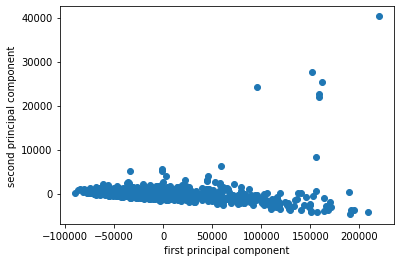

In [9]:
pca = PCA(n_components=2)
raisinPCA = pca.fit_transform(raisinArray)

plt.scatter(raisinPCA[:, 0], raisinPCA[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

From this plot we can see that the data is mostly centered around 0 on the y-axis. There aren't any distinct clusters with the data instead forming one elongated cluster with just a few outliers above. It also looks like as the x-axis value increases, the y-axis value decreases slightly.

###2. (3 points) 
Use sklearn’s PCA implementation to linearly transform the data, without specifying the number of components to use. Create a plot with r, the number of components
(i.e., dimensionality), on the x-axis, and f(r), the fraction of total variance captured in the
first r principal components, on the y-axis. Based on this plot, choose a number of principal
components to reduce the dimensionality of the data. Report how many principal components
will be used as well as the faction of total variance captured using this many components.

[[-6.56076563e+02 -2.39494896e+02 -2.84845208e+01 ...  5.81229227e-01
  -6.51988495e-02 -2.60750182e-02]
 [-1.76944327e+04  5.64730885e+02 -2.58360431e+01 ...  5.00453002e-01
   1.56281239e-03 -3.09223946e-02]
 [ 3.93863494e+03 -4.55555724e+02 -2.75286538e+01 ...  6.26004961e-01
   5.89690011e-02 -3.09909012e-02]
 ...
 [ 1.90893241e+04  1.85643059e+03  3.18919910e+01 ... -3.81936729e-01
  -5.35647612e-02 -2.02319929e-02]
 [ 8.62669069e+03  3.38256021e+02 -5.29239371e+01 ... -2.92069062e-01
   1.84898388e-02 -1.18980224e-02]
 [-2.95404808e+03  2.14203047e+02 -1.49413972e+02 ... -8.87765310e-02
   1.02477611e-02  4.08956771e-02]]
[9.97961885e-01 2.03684406e-03 1.07171065e-06 1.84449123e-07
 1.44262877e-08 3.87672782e-11 5.59451438e-13 4.86424687e-13]


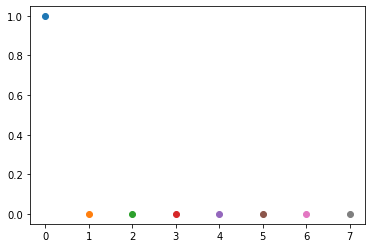

In [26]:
pca2 = PCA()
raisinPCA2 = pca2.fit_transform(raisinArray)

print(raisinPCA2)
len(raisinPCA2)
print(pca2.explained_variance_ratio_)
for i in range(8):
  plt.scatter(i, pca2.explained_variance_ratio_[i])

plt.show()

###3. (5 points) 
For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the number of clusters,
k, that you pass as input to the k-means function, to find clusters in the chosen data set. Use
at least 5 different values of k. For each value of k, report the value of the objective function
for that choice of k.


###4. (5 points) 
For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the minpts and  input
parameters to the DBSCAN function to find clusters in the chosen data set. First, keep 
fixed and try out a range of different values for minpts. Then keep minpts fixed, and try a
range of values for . Use at least 5 values of  and at least 5 values of minpts. Report the
number of clusters found for each (minpts, ) pair tested.


###5. (Extra credit - 3 points)
Create a plot of clustering precision for each value of k used in
question 3.3, each value of  used in question 3.4, and each value of minpts used in question
3.4, for both the original and reduced-dimensionality data.


#Tips and Acknowledgements
Make sure to submit your answer as a PDF on Gradscope and Brightspace. Make sure to show
your work. Include any code snippets you used to generate an answer, using comments in the code to clearly indicate which problem corresponds to which code.

**Acknowledgements**: Project adapted from assignments of Veronika Strnadova-Neeley